# KNN with Iris dataset

In [21]:
#load data set and its features and response 
from sklearn.datasets import load_iris
iris = load_iris()
iris_features = iris.data
iris_response = iris.target

In [13]:
#Print shapes of features and response
print(iris_features.shape)
print(iris_response.shape)

(150, 4)
(150,)


## Scikit learn 4-step modeling pattern

In [14]:
#Import the class you want to use
from sklearn.neighbors import KNeighborsClassifier

In [23]:
#"Instantiate" the "Estimator (Model)"
knn = KNeighborsClassifier(n_neighbors = 5)

In [24]:
#Fir the model with data (Training)
knn.fit(iris_features, iris_response)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [28]:
#Predict the Iris Species
toPredict = [[3,5,4,2],[5,4,3,2]]
results = knn.predict(toPredict)
print(iris.target_names[results])

['versicolor' 'versicolor']


## Using a different classification model

In [61]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 500)
logReg.fit(iris_features, iris_response)
logResults = logReg.predict(toPredict)
print(iris.target_names[logResults])

['setosa' 'setosa']


## Comparing model performance

### Evaluation Procedure 1:
1. Train the model on entire dataset.
2. Test the model on the same dataset.

In [40]:
logRes = logReg.predict(iris_features)
print(len(logRes))

150


In [52]:
#Evaluate by comparing matrices. This gives "training accuracy" - When train and test data is the same.
from sklearn import metrics
print(metrics.accuracy_score(iris_response,logRes))

0.9733333333333334


In [53]:
#For KNN = 5
knnRes = knn.predict(iris_features)
print(metrics.accuracy_score(iris_response,knnRes))

0.9666666666666667


### Evaluation Procedure 2:
1. Split the dataset into two sets. (Training and Testing)
2. Train the model on "Training" set and test it on "Testing" set.
3. Evaluate.

In [65]:
#Split dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris_features,iris_response, test_size = 0.4, random_state = 4)

In [66]:
#Train model
logReg.fit(x_train, y_train)
logPredict = logReg.predict(x_test)

In [67]:
print(metrics.accuracy_score(y_test, logPredict))

0.9666666666666667


In [68]:
#For KNN = 5
knn.fit(x_train, y_train)
knnPredict = knn.predict(x_test)
print(metrics.accuracy_score(y_test, knnPredict))

0.9666666666666667


### How to choose vakue of K?
We can write a for loop and plot testing accuracy vs K value to see which value give more accurate results.


In [72]:
#Try K values from 1 to 25
k_range = range(1,26)
score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    knnPredict = knn.predict(x_test)
    score.append(metrics.accuracy_score(y_test, knnPredict))

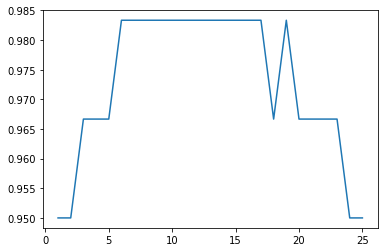

In [74]:
#Plot 
import matplotlib.pyplot as plt

#Allow plots to appear within notebook
%matplotlib inline

#Plot K value vs Testing Accuracy
plt.plot(k_range, score)

### K values 5-19 give the highest accuracy so we'll use k in this range. Say 11

In [75]:
print(score[11])

0.9833333333333333
